In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [25]:
import os

# List all files in the current directory
files = os.listdir('.')

# Filter out CSV files
csv_files = [file for file in files if file.endswith('.csv')]


In [26]:
# Initialize an empty list to store DataFrames
dfs = []

# Loop through the CSV files, read each into a DataFrame, and append it to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)


In [27]:
final_df.to_csv('main.csv', index=False)


In [28]:
df=pd.read_csv('main.csv')

df.replace("Blank",np.nan, inplace=True)
df.replace("No",0, inplace=True)
df.replace("Yes",1, inplace=True)

oh=OneHotEncoder(sparse=False)
cloud9am=pd.DataFrame(oh.fit_transform(np.reshape(df['cloud9am'], (-1,1))), columns=oh.get_feature_names_out(['Category']))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
for column in oh.get_feature_names_out(['Category']):
    df[column]=cloud9am[column]

In [30]:
oh2=OneHotEncoder(sparse=False)
cloud3pm=pd.DataFrame(oh2.fit_transform(np.reshape(df['cloud3pm'], (-1,1))), columns=oh2.get_feature_names_out(['Category']))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
for column in oh2.get_feature_names_out(['Category']):
    df[column]=cloud3pm[column]

In [32]:
df

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,...,Category_Partly Cloudy / Windy,Category_Rain,Category_T-Storm,Category_Thunder,Category_Wintry Mix / Windy,Category_nan,Category_Light Sleet,Category_Rain / Windy,Category_Thunder / Windy,Category_Thunder in the Vicinity
0,2011-01-01,49.0,66.0,0.0,20.0,16.0,20.0,22.0,30.03,30.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-02,41.0,58.0,0.0,12.0,9.0,37.0,24.0,30.35,30.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-03,41.0,61.0,0.0,7.0,10.0,68.0,57.0,30.22,30.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-04,52.0,67.0,0.8,8.0,7.0,90.0,73.0,30.08,29.99,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-05,58.0,73.0,0.0,6.0,14.0,84.0,33.0,29.95,29.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2006-12-27,36.0,63.0,0.0,6.0,12.0,66.0,43.0,30.16,30.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3668,2006-12-28,52.0,71.0,0.0,9.0,16.0,72.0,61.0,29.96,29.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3669,2006-12-29,64.0,73.0,0.2,16.0,18.0,87.0,81.0,29.98,29.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3670,2006-12-30,54.0,63.0,0.2,5.0,6.0,69.0,60.0,29.98,29.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.set_index(['date'])

,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,Category_Partly Cloudy / Windy,Category_Rain,Category_T-Storm,Category_Thunder,Category_Wintry Mix / Windy,Category_nan,Category_Light Sleet,Category_Rain / Windy,Category_Thunder / Windy,Category_Thunder in the Vicinity
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,49.0,66.0,0.0,20.0,16.0,20.0,22.0,30.03,30.06,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-02,41.0,58.0,0.0,12.0,9.0,37.0,24.0,30.35,30.25,Partly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-03,41.0,61.0,0.0,7.0,10.0,68.0,57.0,30.22,30.11,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-04,52.0,67.0,0.8,8.0,7.0,90.0,73.0,30.08,29.99,Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-05,58.0,73.0,0.0,6.0,14.0,84.0,33.0,29.95,29.88,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,36.0,63.0,0.0,6.0,12.0,66.0,43.0,30.16,30.03,Fair,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-12-28,52.0,71.0,0.0,9.0,16.0,72.0,61.0,29.96,29.89,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-12-29,64.0,73.0,0.2,16.0,18.0,87.0,81.0,29.98,29.86,Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df=df.set_index(['date'])

In [35]:
df

,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,Category_Partly Cloudy / Windy,Category_Rain,Category_T-Storm,Category_Thunder,Category_Wintry Mix / Windy,Category_nan,Category_Light Sleet,Category_Rain / Windy,Category_Thunder / Windy,Category_Thunder in the Vicinity
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,49.0,66.0,0.0,20.0,16.0,20.0,22.0,30.03,30.06,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-02,41.0,58.0,0.0,12.0,9.0,37.0,24.0,30.35,30.25,Partly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-03,41.0,61.0,0.0,7.0,10.0,68.0,57.0,30.22,30.11,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-04,52.0,67.0,0.8,8.0,7.0,90.0,73.0,30.08,29.99,Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-05,58.0,73.0,0.0,6.0,14.0,84.0,33.0,29.95,29.88,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,36.0,63.0,0.0,6.0,12.0,66.0,43.0,30.16,30.03,Fair,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-12-28,52.0,71.0,0.0,9.0,16.0,72.0,61.0,29.96,29.89,Mostly Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2006-12-29,64.0,73.0,0.2,16.0,18.0,87.0,81.0,29.98,29.86,Cloudy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df=df[['min_temp','max_temp','temp9am','temp3pm']][:10000].dropna()

from sklearn.model_selection import train_test_split

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df)


In [37]:
scaled_data

array([[0.59036145, 0.49367089, 0.50666667, 0.61797753],
       [0.4939759 , 0.39240506, 0.34666667, 0.53932584],
       [0.4939759 , 0.43037975, 0.38666667, 0.56179775],
       ...,
       [0.77108434, 0.58227848, 0.62666667, 0.68539326],
       [0.65060241, 0.4556962 , 0.54666667, 0.59550562],
       [0.54216867, 0.48101266, 0.42666667, 0.61797753]])

In [38]:
scaled_data[0:3]

array([[0.59036145, 0.49367089, 0.50666667, 0.61797753],
       [0.4939759 , 0.39240506, 0.34666667, 0.53932584],
       [0.4939759 , 0.43037975, 0.38666667, 0.56179775]])

In [39]:
import numpy as np

steps = 20
X = []
y = []

for i in range(len(scaled_data) - steps):
    X.append(scaled_data[i:i+steps])
    y.append(scaled_data[i+steps])

# Convert lists to numpy arrays for TensorFlow processing
X = np.array(X)
y = np.array(y)


In [40]:
y

array([[0.42168675, 0.27848101, 0.22666667, 0.42696629],
       [0.39759036, 0.41772152, 0.28      , 0.56179775],
       [0.48192771, 0.4556962 , 0.48      , 0.57303371],
       ...,
       [0.77108434, 0.58227848, 0.62666667, 0.68539326],
       [0.65060241, 0.4556962 , 0.54666667, 0.59550562],
       [0.54216867, 0.48101266, 0.42666667, 0.61797753]])

In [41]:
from sklearn.model_selection import train_test_split

scaler=MinMaxScaler(feature_range=(0,1))

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, BatchNormalization, Input

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
X_test.shape

(900, 20, 4)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Bidirectional

# Assuming input_shape is (steps, num_features), and we're predicting the next timestep with the same number of features
num_features = scaled_data.shape[1]

model = Sequential([
    Input((steps, num_features)),
    LSTM(8, activation='relu'),
    Dense(num_features),
])
from keras.optimizers import Adam

opt=Adam(1e-1)
model.compile(optimizer=opt, loss='mse')
from keras.callbacks import TensorBoard

import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model
hist=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])


Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6990 - val_loss: 0.0298
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0285 - val_loss: 0.0295
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0291 - val_loss: 0.0294
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0284 - val_loss: 0.0293
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 - val_loss: 0.0292
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273 - val_loss: 0.0283
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260 - val_loss: 0.0256
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232 - val_loss: 0.0189
Epoch 9/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 - val_loss: 0.0120
Epoch 10/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 11/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0088
Epoch 12/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_lo

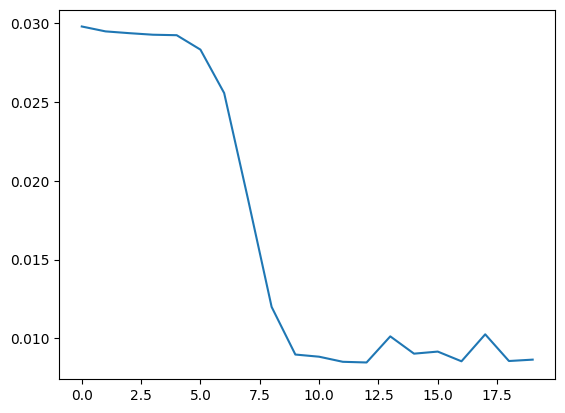

In [68]:
import matplotlib.pyplot as plt

plt.plot(hist.history['val_loss'])